<a href="https://colab.research.google.com/github/cposada8/03MAIR-Algoritmos-de-Optimizacion-CEPM/blob/main/carlos_esteban_posada_AG1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Actividad Guiada 1 del curso: Algoritmos de optimización

**Nombre**: Carlos Esteban Posada  
**URL**: https://colab.research.google.com/drive/1nLEhlOavPebfAYawy4A_KSPBgvXGXx7V?usp=sharing

# Introducción
El presente trabajo corresponde a la primera actividad guiada del curso __algoritmos de optimización__

Este trabajo consiste en la implementación práctica de algunos conceptos vistos en las primeras unidades del curso:
* Algoritmos de ordenamiento
* Técicas de diseño de algoritmos
* Desarrollo de un problema opciónal: par de puntos más cercanos

In [1]:
# imports
import numpy as np
import random 
import matplotlib.pyplot as plt
from time import time

# Algoritmos de ordenamiento [Opcional]
En esta sección se realizará la impelmentación de los siguientes algoritmos de ordenamiento:
* Insertion sort
* Bubble sort
* Selection sort
* Merge sort

## Insertion sort
Es un algoritmo de ordenamiento muy sencillo, pero a su vez, ineficiente. 
Logra un orden de complegidad __O(n)__ en el mejor de los casos, pero __O(n^2)__ en los casos peor y promedio

In [2]:
def insertion_sort(lista):
  lista = lista.copy()
  n = len(lista)
  for i in range(1, n):
    valor_actual = lista[i]
    position = i
    while position > 0 and lista[position-1] > valor_actual:
      lista[position] = lista[position-1]
      position -= 1
    
    lista[position] = valor_actual
  return lista  

In [3]:
# prueba del algoritmo
lista = [2, 3, 8, 6, 1]
print("lista original", lista)
print("lista ordenada", insertion_sort(lista))

lista original [2, 3, 8, 6, 1]
lista ordenada [1, 2, 3, 6, 8]


## Bubble sort

In [4]:
def bubble_sort(lista):
  lista = lista.copy()
  n = len(lista)
  for max_index in range(n-1, 0, -1):
    for i in range(max_index):
      if lista[i]>lista[i+1]:
        lista[i], lista[i+1] = lista[i+1], lista[i] # swap the elements
  return lista

In [5]:
# probamos con la misma lista del algoritmo anterior
bubble_sort(lista)

[1, 2, 3, 6, 8]

## Selection sort
Es un algoritmo que en cada iteración busca el elemento más grande (o pequeño) y lo sitúa en la posición que le corresponde. Es orden n^2 en todos los casos

In [6]:
def selection_sort(lista):
  lista = lista.copy()
  n = len(lista)
  for max_index in range(n, 0, -1):
    max_elem_index = 0
    max_elem = lista[max_elem_index]
    for i in range(max_index):
      if lista[i]>max_elem:
        max_elem = lista[i]
        max_elem_index = i
    # swap max_elem_index with max_index
    lista[max_elem_index], lista[max_index-1] = lista[max_index-1], lista[max_elem_index]
  return lista

In [7]:
lista = [2, 3, 8, 6, 1]
selection_sort(lista)

[1, 2, 3, 6, 8]

## Merge sort


In [8]:
# auxiliar function to implement merge sort
def merge_ordered_lists(l1, l2):
  # this function merges the lists l1 and l2
  # so the resulted list is ordered. 
  # l1 and l2 must be ordered already
  l_merged = []
  while l1 and l2:
    if l1[0]<l2[0]:
      l_merged.append(l1.pop(0))
    else:
      l_merged.append(l2.pop(0))

  # agregar el resto de la lista que sobrara (si alguna aún tiene elementos)
  if l1:
    l_merged += l1
  else:
    l_merged += l2
  return l_merged

In [9]:
def merge_sort(lista):
  if len(lista) == 1:
    return lista
  else:
    # parto a la mitad la lista
    mid = len(lista)//2
    left_list = lista[:mid]
    right_list = lista[mid:]
    return merge_ordered_lists(merge_sort(left_list), merge_sort(right_list))

In [10]:
merge_sort(lista)

[1, 2, 3, 6, 8]

## Comparación de los algoritmos de ordenamiento
En esta sección se realizará una comparación de los algoritmos de ordenamiento anteriormente implementados. 
Miraremos el desempeño de cada uno para listas de distintos tamaños

In [43]:
def calcular_tiempo_sort_function(f, lista):
  t_ini = time()
  sol_isertion = f(lista.copy())
  t_end = time()
  return t_end-t_ini

In [44]:
tamanos =  range(500, 5500, 500)#[10, 100, 1000, 10_000]

In [45]:
# inicialización de las listas que contendrán los tiempos de desempeño de cada algoritmo
t_insertion = []
t_bubble = []
t_selection = []
t_merge = []

for tam in tamanos:
  print("Calculando listas de tamaño:", tam)  
  # Creación de la lista original que cada algoritmo deberá ordenar
  lista = list(np.random.randint(0, 10*tam, tam))

  t_insertion.append(calcular_tiempo_sort_function(insertion_sort, lista))
  t_bubble.append(calcular_tiempo_sort_function(bubble_sort, lista))
  t_selection.append(calcular_tiempo_sort_function(selection_sort, lista))
  t_merge.append(calcular_tiempo_sort_function(merge_sort, lista))

Calculando listas de tamaño: 500
Calculando listas de tamaño: 1000
Calculando listas de tamaño: 1500
Calculando listas de tamaño: 2000
Calculando listas de tamaño: 2500
Calculando listas de tamaño: 3000
Calculando listas de tamaño: 3500
Calculando listas de tamaño: 4000
Calculando listas de tamaño: 4500
Calculando listas de tamaño: 5000


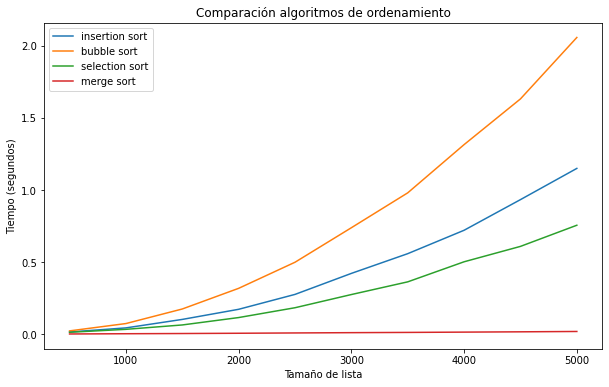

In [46]:
plt.figure(figsize=(10, 6))
plt.plot(tamanos, t_insertion, label="insertion sort")
plt.plot(tamanos, t_bubble, label="bubble sort")
plt.plot(tamanos, t_selection, label="selection sort")
plt.plot(tamanos, t_merge, label="merge sort")
plt.legend()
plt.title("Comparación algoritmos de ordenamiento")
plt.ylabel("Tiempo (segundos)")
plt.xlabel("Tamaño de lista")
plt.show()

Se puede observar cómo el peor algoritmo termina siendo el bubble sort. 
Sigue insertion sort con un desempeño inferior al selection sort.
Y finalmente encontramos al merge sort con un desempeño de lejos mucho mejor que los demás algoritmos implementados

# Técnicas de diseño de algoritmos
En las siguientes secciones desarrollaremos algunas técnicas de diseño de algoritmos con un ejemplo de problema tipo correspondiente

## Divide y Vencerás
Se desarrollará la solución al juego de las Torres de Hanoi por medio de la técnica Divide y Vencerás

In [47]:
def torres_hanoi(n, desde, hasta):
  if n==1:
    print("lleva la ficha ", desde, "hasta", hasta)
  else:
    torres_hanoi(n-1, desde, 6-desde-hasta)
    print("lleva la ficha ", desde, "hasta", hasta)
    torres_hanoi(n-1, 6-desde-hasta, hasta)

In [48]:
# solucionar el juego de 3 torres, llevándolas desde la 1 hasta la 3
torres_hanoi(3, 1, 3)

lleva la ficha  1 hasta 3
lleva la ficha  1 hasta 2
lleva la ficha  3 hasta 2
lleva la ficha  1 hasta 3
lleva la ficha  2 hasta 1
lleva la ficha  2 hasta 3
lleva la ficha  1 hasta 3


## Algoritmos voraces - técnica voraz
Solución del problema de cambio monetario por medio de la técnica voraz

In [49]:
def cambio_monedas(cantidad, sistema):
  solucion = []
  cantidad_faltante = cantidad
  for moneda in sistema:
    cant_monedas = cantidad_faltante//moneda
    solucion.append(cant_monedas)
    cantidad_faltante -= cant_monedas*moneda
  return solucion

In [50]:
cambio_monedas(37, [25, 10, 5, 1])

[1, 1, 0, 2]

## Backtracking y DFS (depth first search)
Problema de las reinas en un tablero de nxn fue resuelto en clase por medio del método de back tracking. 
En esta sección lo abordaré también por el método de DFS 

In [51]:
# Funciones para imprimir
def print_solucion_reinas(solucion):
  for sol in solucion:
    linea = ["#" for i in range(len(solucion))]
    linea[sol] = "R"
    print(" ".join(linea))

def print_soluciones_reinas(soluciones):
  for i, solucion in enumerate(soluciones):
    print(f"solución {i+1}")
    print_solucion_reinas(solucion)
    print()


### Solución por método de back tracking
Esta solución está en base 1. Es decir que las filas se tratarán desde 1 hasta N

In [52]:
def es_prometedora(solucion, etapa):
  for i in range(etapa+1):
    
    # verificar si hay 2 reinas en la misma fila
    if solucion.count(solucion[i]) > 1:
      return False
    
    # verificar diagonales
    for j in range(i+1, etapa+1):
      if abs(i-j) == abs(solucion[i]- solucion[j]):
        return False
  
  return True

# solución del problema de N reinas por método de backtracking
def reinas_bt(N, solucion, etapa):
  for i in range(1, N+1):
    solucion[etapa] = i

    if es_prometedora(solucion, etapa):
      if etapa == N-1:
        print("La solución es:")
        print(solucion)

      else:
        reinas_bt(N, solucion, etapa+1)
    solucion[etapa] = 0


In [53]:
reinas_bt(5, [0 for x in range(5)], 0)

La solución es:
[1, 3, 5, 2, 4]
La solución es:
[1, 4, 2, 5, 3]
La solución es:
[2, 4, 1, 3, 5]
La solución es:
[2, 5, 3, 1, 4]
La solución es:
[3, 1, 4, 2, 5]
La solución es:
[3, 5, 2, 4, 1]
La solución es:
[4, 1, 3, 5, 2]
La solución es:
[4, 2, 5, 3, 1]
La solución es:
[5, 2, 4, 1, 3]
La solución es:
[5, 3, 1, 4, 2]


### Solución por método DFS
Acá se plantea el problema como un grafo. De tal forma que se recorrerá el árbol por medio de la técnica DFS (Depth first search)

Este método está en base 0, es decir que las filas y columnas se tratarán de 0 hasta N-1

In [54]:
def get_hijos_candidato(N, candidato):
  etapa = len(candidato)
  posibles = set(range(N))-set(candidato)
  remover = set()
  for hijo in posibles:
    for i, cand in enumerate(candidato):
      if abs(hijo-cand) == abs(etapa-i):
        remover.add(hijo)
  return list(posibles-remover)

def reinas(N):
  soluciones = []
  candidatos = [[i] for i in range(N)]
  stack_candidatos = candidatos

  # DFS
  while(stack_candidatos):
    candidato = stack_candidatos.pop(-1)
    if len(candidato) == N:
      soluciones.append(candidato)
    else:
      hijos_candidato = get_hijos_candidato(N, candidato)
      for hijo in hijos_candidato:
        stack_candidatos.append(candidato+[hijo])
  return soluciones


In [55]:
print_soluciones_reinas(reinas(5))

solución 1
# # # # R
# # R # #
R # # # #
# # # R #
# R # # #

solución 2
# # # # R
# R # # #
# # # R #
R # # # #
# # R # #

solución 3
# # # R #
# R # # #
# # # # R
# # R # #
R # # # #

solución 4
# # # R #
R # # # #
# # R # #
# # # # R
# R # # #

solución 5
# # R # #
# # # # R
# R # # #
# # # R #
R # # # #

solución 6
# # R # #
R # # # #
# # # R #
# R # # #
# # # # R

solución 7
# R # # #
# # # # R
# # R # #
R # # # #
# # # R #

solución 8
# R # # #
# # # R #
R # # # #
# # R # #
# # # # R

solución 9
R # # # #
# # # R #
# R # # #
# # # # R
# # R # #

solución 10
R # # # #
# # R # #
# # # # R
# R # # #
# # # R #



# Problema opcional:
Encontrar los dos puntos más cercados:
* Dado un conjunto de puntos se trata de encontrar la pareja de puntos más cercanos.
* Guía para aprendizaje:
  * Suponer en 1D
  * Primer intento: fuerza bruta
    * Calcular complejidad: ¿Se puede mejorar?
  * Segundo intento: aplicar divide y vencerás
    * Calcular la complejidad: ¿Se puede mejorar?
  * Extender el algoritmo a 2D
  * Extender el algoritmo a 3D

## Pareja de puntos más cercanos en 1D


### Fuerza bruta
Primero intentaré encontrar la pareja más cercana por fuerza bruta. Esto se hará por medio de buscar todas las posibles combinaciones.

Si tengo N puntos, tendré N*(N-1)/2 combinaciones, lo cual implica un orden algorítmico O(N^2)

In [56]:
def par_mas_cercano_1D_fuerza_bruta(puntos):
  # Esta función retornará: los dos puntos más cercanos y la distancia entre estos
  # todo calculado por el método de fuerza bruta

  # se inicializan los puntos cercanos por defecto en los 2 primeros puntos del arreglo
  cercano_a = puntos[0]
  cercano_b = puntos[1]
  menor_dist = abs(cercano_a-cercano_b) 
  N = len(puntos)
  # se revisan todas las combinaciones de puntos para encontrar la distancia menor
  for i in range(N-1):
    for j in range(i+1, N):
      actual_dist = abs(puntos[i]-puntos[j])
      if actual_dist<menor_dist:
        menor_dist = actual_dist
        cercano_a = puntos[i]
        cercano_b = puntos[j]

  return cercano_a, cercano_b, menor_dist

In [57]:
N = 100
puntos = np.array(random.sample(range(1000*N), N)) # N puntos aleatorios enteros entre 0 y 1000*N-1 (entre 0 y 100.000)
print(puntos)
print()
print("puntos más cercanos y distancia mínima:")
par_mas_cercano_1D_fuerza_bruta(puntos)

[32388 85066 84589 52476 52609 70771 25166 35134 41607  6206 87019 99447
  9125 69469 65423 12375 47962 27079 77215 98838 51893 87111 97292 77098
 15238 10819 89640 81394  8143 36932  3544 81831 18714 65639 14135 81648
 49261 81057 99177 90190 21710 10733 45528 91231 10703 97845 99815 29573
 39843 72787 37916 48319 79356 49947 97424 68473 56983  7233 68904   793
 51976 43223 68334 46550 85926 57260 25111 68920 46660 70483 24121 26836
 77872 55408 90674 33975 49549  9421  2630 36570 63362 46595 71338 55645
 27800 86249  7397 76336 21157 70168 23142 95057 50311 95927 56101 24251
 56266 84430 38349 85179]

puntos más cercanos y distancia mínima:


(68904, 68920, 16)

### Ordenando el arreglo
Dado que estamos tratando con solo una dimensión, el problema se puede resolver de una manera mucho más eficiente. 

Suponiendo un arreglo de números ordenado, encontrar el par de distancia mínima es un problema que se puede resolver en orden O(N)

Ahora, lo que haremos será ordenar primero el arreglo, de tal forma que garanticemos encontrar luego rápidamente la pareja de distancia mínima. 

Por lo tanto, esta aproximación tendrá un orden **O(N)+O(ordenar)**. 
Como usualmente los algoritmos de ordenamiento son orden **O(N*log(N))** entonces el orden final de esta aproximación será **O(N*log(N)+N)** lo que a nivel asintótico será finalmente **O(N*log(N))** 

In [58]:
def par_mas_cercano_1D_ordenando(puntos):
  # Esta función retornará: los dos puntos más cercanos y la distancia entre estos
  # todo calculado por el método de ordenar los puntos primero
  ordenados = sorted(puntos)

  # se inicializan los puntos cercanos por defecto en los 2 primeros puntos del arreglo
  cercano_a = ordenados[0]
  cercano_b = ordenados[1]
  menor_dist = abs(cercano_a-cercano_b) 
  N = len(puntos)
  for i in range(N-1):
    actual_dist = abs(ordenados[i]-ordenados[i+1]) 
    if actual_dist < menor_dist:
      menor_dist = actual_dist
      cercano_a = ordenados[i]
      cercano_b = ordenados[i+1]
  
  return cercano_a, cercano_b, menor_dist

In [59]:
N = 100
puntos = np.array(random.sample(range(1000*N), N)) # N puntos aleatorios enteros entre 0 y 1000*N-1 (entre 0 y 100.000)
print(puntos)
print()
print("puntos más cercanos y distancia mínima:")
par_mas_cercano_1D_ordenando(puntos)

[31093  8615 64784 64591 86887 88437 91830 21504 76383 45308  3811 71997
 85468 34682 77364 75534 18635 59806 88217 90251 84014 63297  3752 18361
 95439 77195 40349 40203 36422 39814 31013 33850 83916 61607 19959  2515
 67155 76982 96055 39980 66993 86722  6877 65075 32981 62522 37347 44677
  9770   798 57826 66016 44901 72014  9077 39448 26953 78569 16859 27135
 43941 70212 87852 32940 10627 97150 37082  4923 32736 83548 68973 66104
 67790 67101 95183 64440 88921 54681  8152 70430 13775 54404 52114 42694
 54908 75149 62012 52940 41237 75310 50661 40665 66593 15338  9262  7591
 73027 87535 20851 80683]

puntos más cercanos y distancia mínima:


(71997, 72014, 17)

### Comparación de ambos métodos
En esta sección se compararán los tiempos de ejecución de ambos métodos para distintos tamaños de entrada

In [60]:
tamanos = range(100, 1100, 100) #, 10000, 50000, 100000]

In [61]:
from time import time
tiempos_fb = []
tiempos_sort = []
for tam in tamanos:
  print("#"*8, "tamaño:", tam, "#"*8)

  # se crean los puntos
  puntos = np.array(random.sample(range(1000*tam), tam))
  # print(puntos)
  # cronometrar las funciones
  # print("cronometrando método fuerza bruta")
  t_ini = time()
  sol_fb = par_mas_cercano_1D_fuerza_bruta(puntos)
  t_end = time()
  t_elapsed = t_end-t_ini
  # print("tiempo:", t_elapsed)
  tiempos_fb.append(t_elapsed)

  # print("cronometrando método ordenando")
  t_ini = time()
  sol_sort = par_mas_cercano_1D_ordenando(puntos)
  t_end = time()
  t_elapsed = t_end-t_ini
  # print("tiempo:", t_elapsed)
  tiempos_sort.append(t_elapsed)

  print("solución fuerza bruta: ", sol_fb, "tiempo: ", tiempos_fb[-1])
  print("solución fuerza sort: ", sol_sort, "tiempo: ", tiempos_sort[-1])
  print()
    

######## tamaño: 100 ########
solución fuerza bruta:  (76872, 76868, 4) tiempo:  0.002852916717529297
solución fuerza sort:  (76868, 76872, 4) tiempo:  0.00010776519775390625

######## tamaño: 200 ########
solución fuerza bruta:  (1654, 1657, 3) tiempo:  0.01280069351196289
solución fuerza sort:  (1654, 1657, 3) tiempo:  0.00016379356384277344

######## tamaño: 300 ########
solución fuerza bruta:  (23006, 23007, 1) tiempo:  0.026395797729492188
solución fuerza sort:  (23006, 23007, 1) tiempo:  0.0002086162567138672

######## tamaño: 400 ########
solución fuerza bruta:  (289092, 289100, 8) tiempo:  0.04435443878173828
solución fuerza sort:  (289092, 289100, 8) tiempo:  0.00026488304138183594

######## tamaño: 500 ########
solución fuerza bruta:  (80477, 80476, 1) tiempo:  0.06716322898864746
solución fuerza sort:  (80476, 80477, 1) tiempo:  0.00034165382385253906

######## tamaño: 600 ########
solución fuerza bruta:  (239642, 239643, 1) tiempo:  0.10556602478027344
solución fuerza sort:

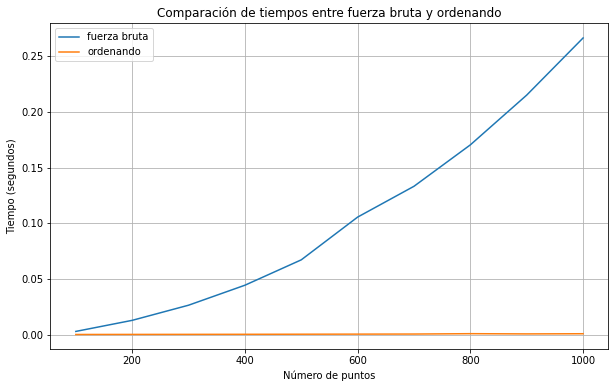

In [62]:
plt.figure(figsize=(10, 6))
plt.plot(tamanos, tiempos_fb, label="fuerza bruta")
plt.plot(tamanos, tiempos_sort, label="ordenando")
plt.legend()
plt.ylabel("Tiempo (segundos)")
plt.xlabel("Número de puntos")
plt.title("Comparación de tiempos entre fuerza bruta y ordenando")
plt.grid()
plt.show()

Nótese cómo el método de fuerza bruta se dispara pues como se mencionó antes es de orden **O(N^2)** mientras que la opción por medio de ordenar la lista antes es orden casi lineal **O(N*log(N))**

## Pareja de puntos más cercanos en **2D**

In [86]:
import math
import copy

In [106]:
# creación de una clase para representar los puntos 2D
class Point2d():
  def __init__(self, x, y, idf=0):
    self.x = x
    self.y = y
    self.idf = idf # identificador

# función para encontrar la distancia euclídea entre 2 puntos
def dist2d(p1, p2):
  return math.sqrt( (p1.x-p2.x)**2 + (p1.y-p2.y)**2 )


### Fuerza bruta
Primero intentaré encontrar la pareja más cercana por fuerza bruta. Esto se hará por medio de buscar todas las posibles combinaciones.

Si tengo N puntos, tendré N*(N-1)/2 combinaciones, lo cual implica un orden algorítmico __O(N^2)**__**

In [107]:
def fuerza_bruta_2d(puntos):
  cercano_a = puntos[0]
  cercano_b = puntos[1]
  menor_dist = dist2d(cercano_a, cercano_b)
  n = len(puntos)
  
  for i in range(n-1):
    for j in range(i+1, n):
      actual_dist = dist2d(puntos[i], puntos[j])
      if actual_dist < menor_dist:
        menor_dist = actual_dist
        cercano_a = puntos[i]
        cercano_b = puntos[j]
  
  return cercano_a, cercano_b, menor_dist



In [178]:
# probemos el método de fuerza bruta
puntos = [Point2d(2, 3, 1), Point2d(12, 30, 2), 
     Point2d(40, 50, 3), Point2d(5, 1, 4),  
     Point2d(12, 10, 5), Point2d(3, 4, 6)] 

In [179]:
fuerza_bruta_2d(puntos)

(<__main__.Point2d at 0x7f26783d95f8>,
 1.4142135623730951)

### Divide y vencerás

In [180]:
def cercanos_franja(franja, d):
  menor_dist = d


  if len(franja) <= 1:
    return None, None, np.inf

  
  cercano_a = franja[0]
  cercano_b = franja[1]
  n = len(franja)
  # seleccionar todos los puntos uno por uno
  # intentar el siguiente punto hasta que la diferencia
  # entre las coordenadas y sea menor que d.
  # NOTA: está demostrado que el siguiente loop corre máximo 6 veces
  for i in range(n):
    j = i+1
    while j < n and (franja[j].y-franja[i].y) < menor_dist:
      menor_dist = dist2d(franja[i], franja[j])
      cercano_a = franja[i]
      cercano_b = franja[j]
      j += 1
  return cercano_a, cercano_b, menor_dist


# Función recursiva para encontrar
# la pareja de puntos con distancia mínima. 
# El arreglo puntos contiene todos los puntos
# ordenados de acuerdo a su coordenada x
def cercanos_rec_2d(puntos, Q):
  n = len(puntos)

  if n<=3:
    return fuerza_bruta_2d(puntos)

  # encontrar el punto del medio
  mid = n//2
  midpoint = puntos[mid]

  # considerar la línea vertical que pasa a través del punto 
  # del medio. Calcula la distancia mínima dl a la izquierda del punto mínimo
  # y la distancia mínima dr a la derecha del punto medio
  p1l, p2l, dl = cercanos_rec_2d(puntos[:mid], Q)
  p1r, p2r, dr = cercanos_rec_2d(puntos[mid:], Q)

  # encontrar la menor de ambas distancias:
  if dl < dr:
    p1, p2, d = p1l, p2l, dl
  else:
    p1, p2, d = p1r, p2r, dr

  # construir la franja: un arreglo de puntos que están 
  # al rededor del punto medio y contiene puntos cercanos a este
  # a una distancia menor o igual que "d"
  franja = []
  for i in range(n):
    if abs(Q[i].x - midpoint.x) <= 10*d:
      franja.append(Q[i])

  
  
  # encontrar los puntos más cercanos en la franja y su distancia mínima
  fa, fb, fd = cercanos_franja(franja, d) # franja_a, franja_b son puntos, fd es distancia
  
  if fd < d:
    return fa, fb, fd
  else:
    return p1, p2, d


In [181]:
# función principal para encontrar los puntos más cercanos en 2d
# usa principalmente la función recursiva cercanos_rec_2d
def cercanos_2d(puntos):
  puntos.sort(key=lambda punto: punto.x)
  Q = copy.deepcopy(puntos)
  Q.sort(key = lambda point: point.y)

  return cercanos_rec_2d(puntos, Q)

In [182]:
cercanos_2d(puntos)

(<__main__.Point2d at 0x7f26783d95f8>,
 1.4142135623730951)

Se puede observar cómo al comparar el método de fuerza bruta y el de divide y vencerás para el mismo conjunto de puntos, arroja el mismo resultado de distancia mínima de __1.4142135...__

### Comparación de ambos métodos

In [190]:
tamanos = range(100, 1100, 100) #, 10000, 50000, 100000]

In [191]:
from time import time
tiempos_fb = []
tiempos_div = []
for tam in tamanos:
  print("#"*8, "tamaño:", tam, "#"*8)

  # se crean los puntos
  puntos = [Point2d(random.randint(1, 100*tam), random.randint(-100*tam, 100*tam)) for x in range(tam)] 
  # print(puntos)
  # cronometrar las funciones
  # print("cronometrando método fuerza bruta")
  t_ini = time()
  sol_fb = fuerza_bruta_2d(puntos)
  t_end = time()
  t_elapsed = t_end-t_ini
  # print("tiempo:", t_elapsed)
  tiempos_fb.append(t_elapsed)

  # print("cronometrando método ordenando")
  t_ini = time()
  sol_div = cercanos_2d(puntos)
  t_end = time()
  t_elapsed = t_end-t_ini
  # print("tiempo:", t_elapsed)
  tiempos_div.append(t_elapsed)

  print("solución fuerza bruta: ", "tiempo: ", tiempos_fb[-1])
  print("solución fuerza div: ", "tiempo: ", tiempos_div[-1])
  print()
    

######## tamaño: 100 ########
solución fuerza bruta:  tiempo:  0.005242347717285156
solución fuerza div:  tiempo:  0.003471851348876953

######## tamaño: 200 ########
solución fuerza bruta:  tiempo:  0.020859479904174805
solución fuerza div:  tiempo:  0.005501508712768555

######## tamaño: 300 ########
solución fuerza bruta:  tiempo:  0.043660879135131836
solución fuerza div:  tiempo:  0.010779619216918945

######## tamaño: 400 ########
solución fuerza bruta:  tiempo:  0.07366514205932617
solución fuerza div:  tiempo:  0.01664257049560547

######## tamaño: 500 ########
solución fuerza bruta:  tiempo:  0.12438750267028809
solución fuerza div:  tiempo:  0.01387643814086914

######## tamaño: 600 ########
solución fuerza bruta:  tiempo:  0.18167471885681152
solución fuerza div:  tiempo:  0.02204108238220215

######## tamaño: 700 ########
solución fuerza bruta:  tiempo:  0.23543834686279297
solución fuerza div:  tiempo:  0.022286176681518555

######## tamaño: 800 ########
solución fuerza br

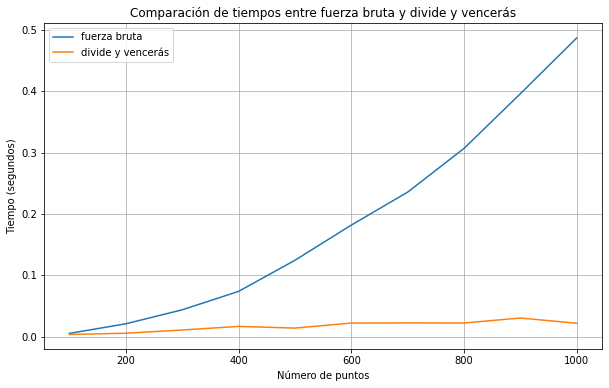

In [192]:
plt.figure(figsize=(10, 6))
plt.plot(tamanos, tiempos_fb, label="fuerza bruta")
plt.plot(tamanos, tiempos_div, label="divide y vencerás")
plt.legend()
plt.ylabel("Tiempo (segundos)")
plt.xlabel("Número de puntos")
plt.title("Comparación de tiempos entre fuerza bruta y divide y vencerás")
plt.grid()
plt.show()